In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageEnhance
from skimage import io
from skimage import color
from skimage.feature import hog
from skimage import data, exposure
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import argparse
import glob

# Dataset

Dataset yang digunakan memiliki format CSV dengan data yang ditampung adalah nama gambar dan kelasnya. Dataset ini dibuat dengan sebelumnya membuat dataset CSV setiap kelas dengan format yang serupa. Program dibawah ini digunakan untuk membuat CSV dari gambar kelas 5 dengan format dataframe yaitu image yang menampung nama gambar dan class yang menyatakan kelas.

from PIL import Image
import os
import pandas as pd

image_class_1 = []

for i in range(2, len(os.listdir(os.getcwd()))):
    image_class_1.append(os.listdir(os.getcwd())[i])

data_class_1 = pd.DataFrame({'image' : image_class_1})
data_class_1['class'] = 5

data_class_1.to_csv('data_class_5.csv', index = False)

Hasil CSV kelas 5 ini kemudian akan digabungkan dengan hasil CSV kelas lainnya menjadi 1 buah CSV utama yang akan digunakan sebagai dataset.

In [2]:
data = pd.read_csv('cow_neckband_image.csv')

In [3]:
data

,image,class
0,WA01_2015_10_1_16_22_15_253889_id1.bmp,1
1,WA01_2015_10_1_16_22_15_253889_id10.bmp,1
2,WA01_2015_10_1_16_22_15_253889_id11.bmp,1
3,WA01_2015_10_1_16_22_15_253889_id2.bmp,1
4,WA01_2015_10_1_16_22_15_253889_id3.bmp,1
...,...,...
1549,WA08_2016_10_2_8_51_15_737651_id6.bmp,8
1550,WA08_2016_10_4_21_34_21_735098_id3.bmp,8
1551,WA08_2016_10_8_7_11_55_440456_id1.bmp,8
1552,WA08_2016_10_8_7_11_55_440456_id2.bmp,8


# Data Preprocessing

In [4]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size = 0.3)
df_train

,image,class
631,WA08_2016_11_11_9_35_7_146131_id6.bmp,3
360,WA08_2016_11_14_15_52_57_96778_id1.bmp,2
351,WA08_2016_11_14_12_8_16_845545_id1.bmp,2
679,WA08_2016_11_14_9_14_28_526146_id5.bmp,3
1337,WA01_2015_11_28_23_47_34_311260_id3.bmp,7
...,...,...
981,WA01_2015_11_22_9_30_9_387132_id2.bmp,5
153,WA01_2015_11_20_14_12_25_59948_id10.bmp,1
550,WA08_2016_10_17_15_51_7_838207_id5.bmp,3
352,WA08_2016_11_14_12_8_16_845545_id2.bmp,2


In [5]:
df_test

,image,class
430,WA08_2017_3_10_10_43_16_328437_id4.bmp,2
580,WA08_2016_10_1_10_0_18_782007_id3.bmp,3
1233,WA08_2016_10_1_9_20_33_56122_id2.bmp,6
942,WA01_2015_10_2_7_39_29_882533_id2.bmp,5
1377,WA08_2016_10_15_10_29_21_224768_id7.bmp,7
...,...,...
1517,WA01_2015_11_30_15_33_18_175259_id1.bmp,8
262,WA08_2016_10_16_8_51_52_259612_id2.bmp,2
1331,WA01_2015_11_28_15_31_59_436121_id10.bmp,7
555,WA08_2016_10_17_16_17_45_283699_id4.bmp,3


## Data Augmentation

In [6]:
df_train_class1 = df_train.loc[df_train['class'] == 1]
len(df_train_class1)

187

In [7]:
df_train_class2 = df_train.loc[df_train['class'] == 2]
len(df_train_class2)

126

In [8]:
df_train_class3 = df_train.loc[df_train['class'] == 3]
len(df_train_class3)

202

In [9]:
df_train_class4 = df_train.loc[df_train['class'] == 4]
len(df_train_class4)

118

In [10]:
df_train_class5 = df_train.loc[df_train['class'] == 5]
len(df_train_class5)

104

In [11]:
df_train_class6 = df_train.loc[df_train['class'] == 6]
len(df_train_class6)

131

In [12]:
df_train_class7 = df_train.loc[df_train['class'] == 7]
len(df_train_class7)

115

In [13]:
df_train_class8 = df_train.loc[df_train['class'] == 8]
len(df_train_class8)

104

In [14]:
images_class1 = df_train_class1['image']
images_class2 = df_train_class2['image']
images_class3 = df_train_class3['image']
images_class4 = df_train_class4['image']
images_class5 = df_train_class5['image']
images_class6 = df_train_class6['image']
images_class7 = df_train_class7['image']
images_class8 = df_train_class8['image']

In [15]:
# mengubah df imgage menjadi list
images_class1 = images_class1.tolist()
arr_images_class1 = np.array([np.asarray(Image.open(img)) for img in images_class1])
arr_images_class1

images_class2 = images_class2.tolist()
arr_images_class2 = np.array([np.asarray(Image.open(img)) for img in images_class2])
arr_images_class2

images_class3 = images_class3.tolist()
arr_images_class3 = np.array([np.asarray(Image.open(img)) for img in images_class3])
arr_images_class3

images_class4 = images_class4.tolist()
arr_images_class4 = np.array([np.asarray(Image.open(img)) for img in images_class4])
arr_images_class4

images_class5 = images_class5.tolist()
arr_images_class5 = np.array([np.asarray(Image.open(img)) for img in images_class5])
arr_images_class5

images_class6 = images_class6.tolist()
arr_images_class6 = np.array([np.asarray(Image.open(img)) for img in images_class6])
arr_images_class6

images_class7 = images_class7.tolist()
arr_images_class7 = np.array([np.asarray(Image.open(img)) for img in images_class7])
arr_images_class7

images_class8 = images_class8.tolist()
arr_images_class8 = np.array([np.asarray(Image.open(img)) for img in images_class8])
arr_images_class8


array([[[[ 61,  50,  44],
         [ 61,  50,  44],
         [ 59,  48,  47],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[ 60,  50,  44],
         [ 60,  50,  44],
         [ 61,  51,  47],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[ 57,  58,  49],
         [ 57,  58,  49],
         [ 61,  55,  52],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[ 97,  95,  98],
         [ 97,  95,  98],
         [ 96,  97,  92],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[ 99,  99,  94],
         [ 99,  99,  94],
         [ 97,  99,  94],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[ 99,  97,  92],
         [ 99,  97,  92],
         [ 96,  99,  96],
         ...,
         [255, 255, 255],
        

In [16]:
#images_class1
len(images_class1)

187

In [17]:
datagen = ImageDataGenerator(rotation_range=90, brightness_range=[0.2,1.0], width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1)

In [18]:
for f in images_class1:
    img = load_img(f, target_size=(200,200))  
    x = img_to_array(img) 
    x = x.reshape((1, ) + x.shape)
    i = 0 
    for batch in datagen.flow(x, batch_size = 16, 
                      save_to_dir ='augmented-images/class1',  
                      save_prefix ='class1', save_format ='bmp'):
        i += 1
        if i == 2: 
            break

In [19]:
for f in images_class2:
    img = load_img(f, target_size=(200,200))  
    x = img_to_array(img) 
    x = x.reshape((1, ) + x.shape)
    i = 0 
    for batch in datagen.flow(x, batch_size = 16, 
                      save_to_dir ='augmented-images/class2',  
                      save_prefix ='class2', save_format ='bmp'):
        i += 1
        if i == 2: 
            break

In [20]:
for f in images_class3:
    img = load_img(f, target_size=(200,200))  
    x = img_to_array(img) 
    x = x.reshape((1, ) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size = 16, 
                      save_to_dir ='augmented-images/class3',  
                      save_prefix ='class3', save_format ='bmp'):
        i += 1
        if i == 2: 
            break

In [21]:
for f in images_class4:
    img = load_img(f, target_size=(200,200))  
    x = img_to_array(img) 
    x = x.reshape((1, ) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size = 16, 
                      save_to_dir ='augmented-images/class4',  
                      save_prefix ='class4', save_format ='bmp'):
        i += 1
        if i == 2: 
            break

In [22]:
for f in images_class5:
    img = load_img(f, target_size=(200,200)) 
    x = img_to_array(img) 
    x = x.reshape((1, ) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size = 16, 
                      save_to_dir ='augmented-images/class5',  
                      save_prefix ='class5', save_format ='bmp'):
        i += 1
        if i == 2: 
            break

In [23]:
for f in images_class6:
    img = load_img(f, target_size=(200,200)) 
    x = img_to_array(img) 
    x = x.reshape((1, ) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size = 16, 
                      save_to_dir ='augmented-images/class6',  
                      save_prefix ='class6', save_format ='bmp'):
        i += 1
        if i == 2: 
            break

In [24]:
for f in images_class7:
    img = load_img(f, target_size=(200,200)) 
    x = img_to_array(img) 
    x = x.reshape((1, ) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size = 16, 
                      save_to_dir ='augmented-images/class7',  
                      save_prefix ='class7', save_format ='bmp'):
        i += 1
        if i == 2: 
            break

In [25]:
for f in images_class8:
    img = load_img(f, target_size=(200,200))  
    x = img_to_array(img)
    x = x.reshape((1, ) + x.shape)
    i = 0
    for batch in datagen.flow(x, batch_size = 16, 
                      save_to_dir ='augmented-images/class8',  
                      save_prefix ='class8', save_format ='bmp'):
        i += 1
        if i == 2: 
            break

In [26]:
aug_imgs_class1 = glob.glob('augmented-images/class1/*.bmp')
aug_imgs_class2 = glob.glob('augmented-images/class2/*.bmp')
aug_imgs_class3 = glob.glob('augmented-images/class3/*.bmp')
aug_imgs_class4 = glob.glob('augmented-images/class4/*.bmp')
aug_imgs_class5 = glob.glob('augmented-images/class5/*.bmp')
aug_imgs_class6 = glob.glob('augmented-images/class6/*.bmp')
aug_imgs_class7 = glob.glob('augmented-images/class7/*.bmp')
aug_imgs_class8 = glob.glob('augmented-images/class8/*.bmp')

In [27]:
len(aug_imgs_class1)

1657

In [28]:
list_num1 = []
for i in range(len(aug_imgs_class1)):
    list_num1.append(1)

list_num2 = []
for i in range(len(aug_imgs_class2)):
    list_num2.append(2)

list_num3 = []
for i in range(len(aug_imgs_class3)):
    list_num3.append(3)

list_num4 = []
for i in range(len(aug_imgs_class4)):
    list_num4.append(4)

list_num5 = []
for i in range(len(aug_imgs_class5)):
    list_num5.append(5)

list_num6 = []
for i in range(len(aug_imgs_class6)):
    list_num6.append(6)

list_num7 = []
for i in range(len(aug_imgs_class7)):
    list_num7.append(7)

list_num8 = []
for i in range(len(aug_imgs_class8)):
    list_num8.append(8)

In [29]:
len(list_num8)

973

In [30]:
list_num_class = list_num1 + list_num2 + list_num3 + list_num4 + list_num5 + list_num6 + list_num7 + list_num8

In [31]:
len(list_num_class)

10137

In [32]:
list_images = aug_imgs_class1 + aug_imgs_class2 + aug_imgs_class3 + aug_imgs_class4 + aug_imgs_class5 + aug_imgs_class6 + aug_imgs_class7 + aug_imgs_class8
len(list_images)

10137

In [33]:
d = {"image": list_images, "class": list_num_class}
df = pd.DataFrame(d)
df_augmented_train = df
df_augmented_train

,image,class
0,augmented-images/class1\class1_0_1003.bmp,1
1,augmented-images/class1\class1_0_1004.bmp,1
2,augmented-images/class1\class1_0_101.bmp,1
3,augmented-images/class1\class1_0_1010.bmp,1
4,augmented-images/class1\class1_0_1014.bmp,1
...,...,...
10132,augmented-images/class8\class8_0_9988.bmp,8
10133,augmented-images/class8\class8_0_9993.bmp,8
10134,augmented-images/class8\class8_0_9994.bmp,8
10135,augmented-images/class8\class8_0_9995.bmp,8


In [34]:
df_test

,image,class
430,WA08_2017_3_10_10_43_16_328437_id4.bmp,2
580,WA08_2016_10_1_10_0_18_782007_id3.bmp,3
1233,WA08_2016_10_1_9_20_33_56122_id2.bmp,6
942,WA01_2015_10_2_7_39_29_882533_id2.bmp,5
1377,WA08_2016_10_15_10_29_21_224768_id7.bmp,7
...,...,...
1517,WA01_2015_11_30_15_33_18_175259_id1.bmp,8
262,WA08_2016_10_16_8_51_52_259612_id2.bmp,2
1331,WA01_2015_11_28_15_31_59_436121_id10.bmp,7
555,WA08_2016_10_17_16_17_45_283699_id4.bmp,3


In [35]:
df_test = df_test.reset_index(drop=True)
df_test

,image,class
0,WA08_2017_3_10_10_43_16_328437_id4.bmp,2
1,WA08_2016_10_1_10_0_18_782007_id3.bmp,3
2,WA08_2016_10_1_9_20_33_56122_id2.bmp,6
3,WA01_2015_10_2_7_39_29_882533_id2.bmp,5
4,WA08_2016_10_15_10_29_21_224768_id7.bmp,7
...,...,...
462,WA01_2015_11_30_15_33_18_175259_id1.bmp,8
463,WA08_2016_10_16_8_51_52_259612_id2.bmp,2
464,WA01_2015_11_28_15_31_59_436121_id10.bmp,7
465,WA08_2016_10_17_16_17_45_283699_id4.bmp,3


In [36]:
df_augmented_train

,image,class
0,augmented-images/class1\class1_0_1003.bmp,1
1,augmented-images/class1\class1_0_1004.bmp,1
2,augmented-images/class1\class1_0_101.bmp,1
3,augmented-images/class1\class1_0_1010.bmp,1
4,augmented-images/class1\class1_0_1014.bmp,1
...,...,...
10132,augmented-images/class8\class8_0_9988.bmp,8
10133,augmented-images/class8\class8_0_9993.bmp,8
10134,augmented-images/class8\class8_0_9994.bmp,8
10135,augmented-images/class8\class8_0_9995.bmp,8


In [37]:
df_train = df_train.reset_index(drop=True)
df_train

,image,class
0,WA08_2016_11_11_9_35_7_146131_id6.bmp,3
1,WA08_2016_11_14_15_52_57_96778_id1.bmp,2
2,WA08_2016_11_14_12_8_16_845545_id1.bmp,2
3,WA08_2016_11_14_9_14_28_526146_id5.bmp,3
4,WA01_2015_11_28_23_47_34_311260_id3.bmp,7
...,...,...
1082,WA01_2015_11_22_9_30_9_387132_id2.bmp,5
1083,WA01_2015_11_20_14_12_25_59948_id10.bmp,1
1084,WA08_2016_10_17_15_51_7_838207_id5.bmp,3
1085,WA08_2016_11_14_12_8_16_845545_id2.bmp,2


In [38]:
df_train_concat = pd.concat([df_train,df_augmented_train], ignore_index=True)
df_train_concat

,image,class
0,WA08_2016_11_11_9_35_7_146131_id6.bmp,3
1,WA08_2016_11_14_15_52_57_96778_id1.bmp,2
2,WA08_2016_11_14_12_8_16_845545_id1.bmp,2
3,WA08_2016_11_14_9_14_28_526146_id5.bmp,3
4,WA01_2015_11_28_23_47_34_311260_id3.bmp,7
...,...,...
11219,augmented-images/class8\class8_0_9988.bmp,8
11220,augmented-images/class8\class8_0_9993.bmp,8
11221,augmented-images/class8\class8_0_9994.bmp,8
11222,augmented-images/class8\class8_0_9995.bmp,8


## Change BMP to Grayscale

In [39]:
# train dataset
train_data_gray = []

for i in tqdm(df_train_concat['image']):
    image = Image.open(i)
    image = image.resize((200,200))
    train_data_gray.append(color.rgb2gray(np.array(image.convert('RGB'))))
    
# test dataset
test_data_gray = []
for i in tqdm(df_test['image']):
    image = Image.open(i)
    image = image.resize((200,200))
    test_data_gray.append(color.rgb2gray(np.array(image.convert('RGB'))))

100%|████████████████████████████████████████████████████████████████████████████████| 467/467 [00:21<00:00, 22.12it/s]


In [40]:
len(train_data_gray)

11224

In [41]:
len(test_data_gray)

467

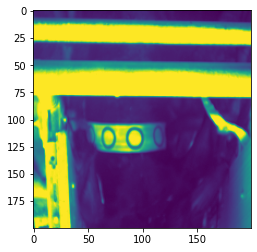

In [42]:
plt.imshow(train_data_gray[25])

## Histogram of Oriented Gradient

In [43]:
ppc = 16

train_hog_features = []

for image in tqdm(train_data_gray):
    fd = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(1, 1), visualize = False)
    train_hog_features.append(fd)

test_hog_features = []

for image in tqdm(test_data_gray):
    fd = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(1, 1), visualize = False)
    test_hog_features.append(fd)

100%|████████████████████████████████████████████████████████████████████████████████| 467/467 [00:07<00:00, 61.77it/s]


In [46]:
train_hog_features[1]

array([0.27053388, 0.13156351, 0.41785675, ..., 0.14672398, 0.22268104,
       0.41973934])

In [44]:
train_hog_features[1].shape

(1152,)

In [45]:
train_labels = df_train_concat['class']
train_labels

0       6
1       1
2       2
3       4
4       5
       ..
9314    8
9315    8
9316    8
9317    8
9318    8
Name: class, Length: 9319, dtype: int64

In [46]:
test_labels = df_test['class']
test_labels

0      7
1      8
2      1
3      4
4      8
      ..
462    2
463    1
464    1
465    1
466    2
Name: class, Length: 467, dtype: int64

In [47]:
train_hog_features = np.array(train_hog_features)
train_hog_features_df = pd.concat([pd.DataFrame(train_hog_features), train_labels], axis = 1)

test_hog_features = np.array(test_hog_features)
test_hog_features_df = pd.concat([pd.DataFrame(test_hog_features), test_labels], axis = 1)

In [48]:
train_hog_features_df

,0,1,2,3,4,5,6,7,8,9,...,1143,1144,1145,1146,1147,1148,1149,1150,1151,class
0,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.373596,0.265441,...,0.274780,0.803114,0.506760,0.138183,0.061454,0.095362,0.045682,0.091473,0.236184,6
1,0.039246,0.013961,0.055594,0.698533,0.698533,0.127385,0.035416,0.042397,0.099198,0.004659,...,0.311814,0.706861,0.706861,0.005071,0.000000,0.000000,0.000000,0.000000,0.025887,1
2,0.249462,0.180553,0.445852,0.445852,0.445852,0.445852,0.114118,0.311467,0.251909,0.139108,...,0.462994,0.702835,0.506002,0.314731,0.161482,0.077496,0.173076,0.120701,0.272624,2
3,0.196549,0.050677,0.403753,0.576308,0.576308,0.311412,0.122753,0.139554,0.143025,0.034205,...,0.411482,0.626687,0.306821,0.005612,0.000000,0.000000,0.046373,0.343811,0.626687,4
4,0.281776,0.300310,0.471736,0.471736,0.471736,0.270801,0.228339,0.193232,0.226223,0.206299,...,0.396284,0.533043,0.533043,0.533043,0.241002,0.141960,0.188721,0.064054,0.172168,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9314,0.217332,0.012543,0.000000,0.084746,0.547407,0.547407,0.547407,0.215554,0.329428,0.023351,...,0.070573,0.041761,0.006971,0.022663,0.029843,0.174962,0.688241,0.688241,0.137265,8
9315,0.436560,0.034680,0.095987,0.340336,0.504138,0.504138,0.367543,0.199431,0.405692,0.363428,...,0.378271,0.211224,0.091553,0.002849,0.020956,0.810082,0.455863,0.286237,0.024065,8
9316,0.276339,0.016307,0.020987,0.043167,0.382401,0.616757,0.616757,0.118568,0.395290,0.292826,...,0.062882,0.000000,0.000890,0.000000,0.000000,0.047267,0.998659,0.021102,0.000000,8
9317,0.135684,0.037929,0.012503,0.038898,0.384277,0.903842,0.115510,0.023239,0.004772,0.022338,...,0.104669,0.025142,0.019296,0.045931,0.033886,0.471111,0.608365,0.608365,0.183239,8


In [49]:
test_hog_features_df

,0,1,2,3,4,5,6,7,8,9,...,1143,1144,1145,1146,1147,1148,1149,1150,1151,class
0,0.163217,0.004790,0.230192,0.594838,0.594838,0.391038,0.095680,0.224986,0.070015,0.043293,...,0.405762,0.657964,0.168080,0.000000,0.000000,0.000000,0.001345,0.325444,0.657964,7
1,0.120304,0.005636,0.155636,0.671270,0.671270,0.215318,0.037045,0.111042,0.094843,0.020558,...,0.451243,0.676260,0.349431,0.000000,0.000000,0.000000,0.000000,0.040118,0.647272,8
2,0.289258,0.144584,0.294644,0.445465,0.445465,0.427885,0.332443,0.343698,0.016842,0.002518,...,0.412175,0.361879,0.361879,0.361879,0.361879,0.288629,0.361879,0.361879,0.361879,1
3,0.130464,0.012936,0.007152,0.661692,0.661692,0.071684,0.233037,0.218275,0.074618,0.016183,...,0.486309,0.690105,0.046453,0.000000,0.000000,0.000000,0.000000,0.212962,0.690105,4
4,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.387257,0.387257,...,0.520756,0.644046,0.644046,0.220605,0.029272,0.011940,0.018493,0.128040,0.322503,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,0.257886,0.388078,0.445382,0.445382,0.445382,0.343896,0.240337,0.108480,0.231253,0.274824,...,0.439695,0.425061,0.425061,0.425061,0.365204,0.245159,0.340018,0.134372,0.361696,2
463,0.240283,0.178567,0.353054,0.513287,0.513287,0.238083,0.159912,0.420178,0.365590,0.133751,...,0.450609,0.180619,0.371748,0.371748,0.371748,0.371748,0.371748,0.371748,0.371748,1
464,0.284681,0.155756,0.280189,0.528793,0.528793,0.346082,0.128859,0.347231,0.443741,0.121244,...,0.462287,0.453261,0.453261,0.355456,0.166681,0.117302,0.156982,0.437182,0.453261,1
465,0.160946,0.010410,0.033799,0.691767,0.691767,0.075176,0.017131,0.099083,0.156562,0.025249,...,0.456135,0.706627,0.000000,0.000000,0.000000,0.000000,0.000000,0.036837,0.706627,1


# Modelling

In [50]:
train = train_hog_features_df
test = test_hog_features_df

In [51]:
train = train.sample(frac=1)
train

,0,1,2,3,4,5,6,7,8,9,...,1143,1144,1145,1146,1147,1148,1149,1150,1151,class
3569,0.053439,0.000000,0.001584,0.004386,0.408916,0.196086,0.889294,0.024828,0.412389,0.001157,...,0.029399,0.000000,0.000634,0.000982,0.001993,0.000538,0.089939,0.995905,0.008889,3
4721,0.263813,0.001753,0.001674,0.003332,0.199771,0.667262,0.667262,0.000000,0.226474,0.000000,...,0.048356,0.003662,0.000338,0.002447,0.000000,0.002674,0.707063,0.707063,0.009872,3
88,0.307042,0.251115,0.317859,0.440356,0.440356,0.440356,0.362088,0.169655,0.364284,0.328368,...,0.513957,0.540158,0.540158,0.318597,0.180246,0.194820,0.164351,0.362862,0.292970,3
1341,0.014076,0.002254,0.009248,0.709192,0.704808,0.001113,0.001361,0.000621,0.102309,0.108507,...,0.523437,0.635353,0.175933,0.081987,0.126399,0.121493,0.132838,0.326489,0.635353,1
7955,0.493841,0.493841,0.350523,0.244109,0.493841,0.170795,0.073898,0.226438,0.690896,0.690896,...,0.023935,0.030238,0.029563,0.079939,0.689351,0.689351,0.175685,0.073709,0.071502,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,0.194096,0.111651,0.237438,0.622283,0.622283,0.318262,0.079906,0.106466,0.345224,0.084642,...,0.451057,0.692764,0.073673,0.009692,0.002297,0.003371,0.004942,0.185994,0.692764,1
234,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.353553,0.382953,0.382953,...,0.396062,0.384400,0.384400,0.384400,0.373263,0.251432,0.242156,0.384400,0.384400,8
7781,0.577350,0.000000,0.000000,0.000000,0.577350,0.000000,0.577350,0.000000,0.352955,0.000789,...,0.692991,0.530172,0.000000,0.000000,0.000000,0.000000,0.000000,0.599549,0.599549,7
6352,0.292308,0.000000,0.000000,0.000000,0.468734,0.589425,0.589425,0.000000,0.025144,0.000000,...,0.243712,0.004734,0.000000,0.000000,0.001649,0.038624,0.706519,0.706519,0.012022,5


In [52]:
test = test.sample(frac=1)
test

,0,1,2,3,4,5,6,7,8,9,...,1143,1144,1145,1146,1147,1148,1149,1150,1151,class
376,0.372582,0.168163,0.372582,0.372582,0.372582,0.372582,0.372582,0.372582,0.334022,0.219427,...,0.540700,0.697943,0.697943,0.103914,0.064824,0.016501,0.008018,0.009101,0.101643,2
48,0.187242,0.166728,0.451834,0.490183,0.490183,0.421606,0.166621,0.216599,0.201291,0.250167,...,0.540813,0.470956,0.470956,0.470956,0.470956,0.079723,0.118920,0.230216,0.198259,3
241,0.371567,0.330772,0.371567,0.371567,0.371567,0.371567,0.371567,0.249437,0.378786,0.205900,...,0.496111,0.615189,0.615189,0.337692,0.144411,0.155464,0.043442,0.202038,0.203269,2
41,0.184474,0.166900,0.393725,0.497609,0.497609,0.447114,0.265096,0.132956,0.176588,0.283158,...,0.497599,0.538990,0.538990,0.531581,0.209501,0.072705,0.099174,0.153102,0.232271,2
331,0.105543,0.022140,0.106800,0.586174,0.586174,0.510772,0.133635,0.104971,0.238589,0.136145,...,0.365480,0.431751,0.431751,0.431751,0.431751,0.337185,0.072918,0.336560,0.148594,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,0.198726,0.099464,0.293765,0.535687,0.535687,0.476563,0.237182,0.083835,0.204283,0.196994,...,0.340631,0.470078,0.470078,0.470078,0.354285,0.235658,0.111939,0.131698,0.355179,3
182,0.127849,0.117586,0.491157,0.499021,0.499021,0.447425,0.136368,0.108463,0.190088,0.041387,...,0.429181,0.618761,0.277815,0.062538,0.011895,0.042222,0.081346,0.380309,0.618761,8
160,0.337426,0.384061,0.384061,0.384061,0.384061,0.384061,0.277582,0.267539,0.438420,0.367946,...,0.511156,0.476201,0.476201,0.401339,0.289540,0.054512,0.145818,0.224849,0.476201,8
392,0.255186,0.037337,0.313129,0.573977,0.573977,0.240173,0.084747,0.334173,0.363752,0.037103,...,0.348063,0.671852,0.157192,0.000000,0.000000,0.000000,0.137327,0.231652,0.671852,6


In [53]:
y_train = train['class']
y_test = test['class']

In [54]:
train.drop(['class'], axis = 1, inplace = True)
test.drop(['class'], axis = 1, inplace = True)

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier()
rf.fit(train, y_train)
print("Random Forest Accuracy Score : ", accuracy_score(rf.predict(test), y_test))
print("Random Forest Confusion Matrix : \n", confusion_matrix(rf.predict(test), y_test))

Random Forest Accuracy Score :  0.9186295503211992
Random Forest Confusion Matrix : 
 [[77  0  0  1  1  3  2  2]
 [ 0 63  1  0  4  6  0  2]
 [ 0  3 83  0  1  0  2  3]
 [ 0  0  0 50  0  0  0  0]
 [ 0  0  0  0 31  0  0  0]
 [ 0  1  0  0  1 48  1  4]
 [ 0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0  0 33]]


In [75]:
list_ytrain = list(y_train.unique())
list_string = list(map(str, list_ytrain))

In [80]:
from sklearn.metrics import classification_report

print(classification_report(rf.predict(test), y_test, labels = y_train.unique()))

              precision    recall  f1-score   support

           3       0.99      0.90      0.94        92
           1       1.00      0.90      0.94        86
           7       0.90      1.00      0.95        44
           5       0.82      1.00      0.90        31
           8       0.75      1.00      0.86        33
           2       0.94      0.83      0.88        76
           4       0.98      1.00      0.99        50
           6       0.84      0.87      0.86        55

    accuracy                           0.92       467
   macro avg       0.90      0.94      0.91       467
weighted avg       0.93      0.92      0.92       467



## Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(train, y_train)
print("Logistic Regression Accuracy Score : ", accuracy_score(logreg.predict(test), y_test))
print("Logistic Regression Confusion Matrix : \n", confusion_matrix(logreg.predict(test), y_test))

Logistic Regression Accuracy Score :  0.8479657387580299
Logistic Regression Confusion Matrix : 
 [[77  0  0  1  0  0  3  1]
 [ 0 53  2  0  0  2  0  0]
 [ 0  7 69  3  1  1  0  2]
 [ 0  1  3 46  2  0  0  3]
 [ 0  1  4  0 28  5  0  0]
 [ 0  3  5  0  2 45  1  3]
 [ 0  2  1  0  1  1 44  1]
 [ 0  0  0  1  4  3  1 34]]


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier()
knn.fit(train, y_train)
print("KNN Accuracy Score : ", accuracy_score(knn.predict(test), y_test))
print("KNN Confusion Matrix : \n", confusion_matrix(knn.predict(test), y_test))

KNN Accuracy Score :  0.8886509635974305
KNN Confusion Matrix : 
 [[77  0  0  3  2  5  3  4]
 [ 0 63  3  0  3  4  1  1]
 [ 0  2 81  1  0  1  0  1]
 [ 0  1  0 46  2  0  0  6]
 [ 0  0  0  0 30  0  0  2]
 [ 0  1  0  0  0 47  0  4]
 [ 0  0  0  0  1  0 45  0]
 [ 0  0  0  1  0  0  0 26]]


## Voting Classifier (KNN, Random Forest, Logistic Regression)